In [1]:
import numpy as np
from numpy.random import *
from numpy import *
import pandas as pd
from pandas import *
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import webbrowser
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train.dropna(subset=['Embarked'], inplace=True, axis=0)

In [10]:
import io
import requests
url="https://github.com/thisisjasonjafari/my-datascientise-handcode/raw/master/005-datavisualization/titanic.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))
 
test_data_with_labels = c
test_data = pd.read_csv('test.csv')

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan , strategy='mean')
train[['Age']] = imputer.fit_transform(train[['Age']])
test[['Age','Fare']] = imputer.fit_transform(test[['Age','Fare']])

print("             Sum of NaN")
train.isnull().sum()

             Sum of NaN


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
test['Fare'].fillna(train['Fare'].mean, inplace=True)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [13]:
def Gender_Child(passenger): 
    age,gender=passenger
    if age<16:
        return 'Child'
    else:
        return gender

In [14]:
ca = train['Cabin'].dropna()
# This line drops the missing values from the `Cabin` column in the `train` DataFrame.

In [15]:
#Add New Column
train['Person']=train[['Age','Sex']].apply(Gender_Child,axis=1)

In [16]:
train['Person'][train['Person']=='Child']

7      Child
9      Child
10     Child
14     Child
16     Child
       ...  
831    Child
850    Child
852    Child
869    Child
875    Child
Name: Person, Length: 83, dtype: object

Person
male      537
female    269
Child      83
Name: count, dtype: int64

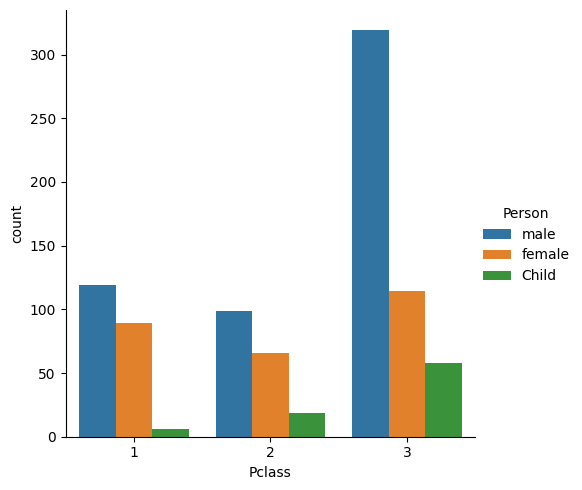

In [17]:
sns.catplot(x='Pclass',data=train,kind='count',hue='Person')
train['Person'].value_counts()

In [18]:
classes = []
for cls in ca:
    classes.append(cls[0])
# This line iterates through the `ca` list and appends the first character of each cabin value to the `classes` list.
classes

['C',
 'C',
 'E',
 'G',
 'C',
 'D',
 'A',
 'C',
 'B',
 'D',
 'B',
 'C',
 'C',
 'F',
 'F',
 'C',
 'E',
 'A',
 'D',
 'D',
 'C',
 'B',
 'E',
 'D',
 'F',
 'D',
 'C',
 'B',
 'F',
 'C',
 'E',
 'B',
 'A',
 'C',
 'F',
 'A',
 'F',
 'B',
 'B',
 'G',
 'A',
 'D',
 'D',
 'C',
 'C',
 'C',
 'D',
 'G',
 'C',
 'B',
 'E',
 'B',
 'C',
 'C',
 'C',
 'D',
 'A',
 'B',
 'D',
 'C',
 'C',
 'B',
 'E',
 'C',
 'C',
 'E',
 'C',
 'B',
 'C',
 'E',
 'C',
 'D',
 'B',
 'C',
 'C',
 'C',
 'E',
 'T',
 'F',
 'C',
 'F',
 'C',
 'E',
 'D',
 'B',
 'E',
 'C',
 'B',
 'D',
 'G',
 'C',
 'E',
 'C',
 'E',
 'B',
 'C',
 'A',
 'C',
 'C',
 'C',
 'E',
 'D',
 'E',
 'E',
 'D',
 'A',
 'B',
 'C',
 'B',
 'C',
 'D',
 'C',
 'B',
 'C',
 'E',
 'D',
 'F',
 'B',
 'B',
 'C',
 'B',
 'B',
 'B',
 'C',
 'C',
 'A',
 'E',
 'C',
 'E',
 'E',
 'C',
 'A',
 'E',
 'B',
 'D',
 'A',
 'C',
 'F',
 'D',
 'D',
 'D',
 'A',
 'B',
 'B',
 'D',
 'A',
 'D',
 'E',
 'C',
 'B',
 'B',
 'D',
 'B',
 'B',
 'C',
 'F',
 'C',
 'E',
 'E',
 'C',
 'C',
 'C',
 'F',
 'C',
 'E',
 'E',
 'B'

In [19]:
cabins = DataFrame(classes)
# This line creates a new DataFrame called `cabins` that stores the `classes` list.
cabins.columns = ['Cabin']
# This line sets the column name of the `cabins` DataFrame to `Cabin`.

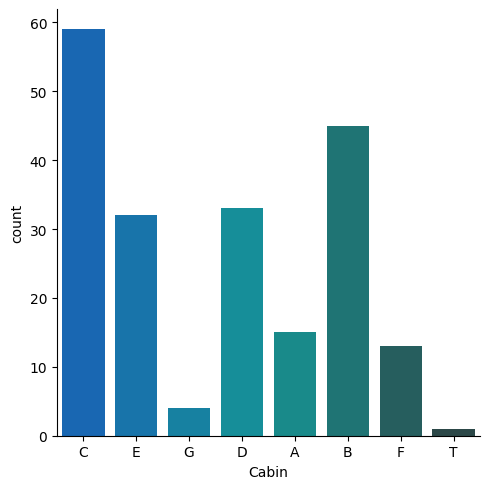

In [20]:
sns.catplot(x='Cabin',data=cabins,kind='count',palette='winter_d')

In [21]:
def variables(df):
    df['Title'] = df['Name'].apply(lambda x : x.split(' ')[1].strip('123,./!?'))
    df.drop('Name', axis = 1 , inplace = True)
    df['Title'] = df['Title'].apply(lambda x : x if x in ['Mr','Miss','Mrs','Master'] else 'NoTitle')
    #df['Is_Married'] = 0
    #df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1
    df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
    df['Title'] = df['Title'].map({'NoTitle' : 0 , 'Miss': 1, 'Mrs' : 2,'Mr' :3 ,'Master' : 4})
variables(train)
variables(test)

In [22]:
train = train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family_Size','Title']]
test = test[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family_Size','Title']]

In [23]:
train = pd.get_dummies(train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family_Size','Title']],drop_first=True)
test = pd.get_dummies(test[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family_Size','Title']],drop_first=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Title,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,2,3,True,False,True
1,1,1,38.0,1,0,71.2833,2,2,False,False,False
2,1,3,26.0,0,0,7.9250,1,1,False,False,True
3,1,1,35.0,1,0,53.1000,2,2,False,False,True
4,0,3,35.0,0,0,8.0500,1,3,True,False,True


[Text(0, 0, '161'),
 Text(0, 0, '89'),
 Text(0, 0, '59'),
 Text(0, 0, '21'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

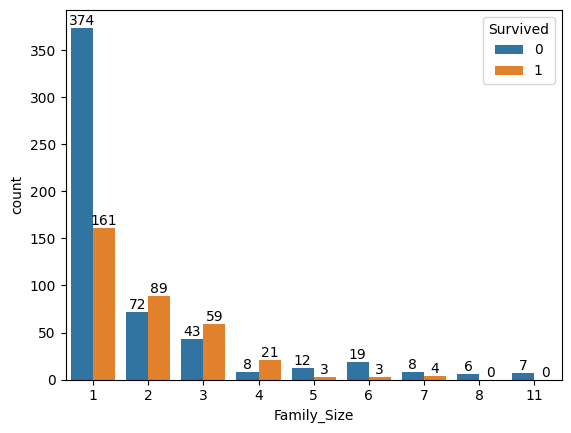

In [24]:
ax = sns.countplot(x='Family_Size', hue='Survived', data=train)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

In [25]:
X,y = train.iloc[:,1:].values, train.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size = 0.3,
                                                random_state=0,
                                                stratify=y)
X_sub = test.iloc[:,1:].values

### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_depth=6,
                            random_state=5)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("Accuracy score for Random Forest:",round(accuracy_score(y_test, pred_rf),4))

Accuracy score for Random Forest: 0.8689


### Decision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=6,
                            random_state=5)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print("Accuracy score for Decision Tree:",round(accuracy_score(y_test, pred_dt),4))

Accuracy score for Decision Tree: 0.8427


### Support vector machines:

In [28]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print("Accuracy score for SVC:",round(accuracy_score(y_test, pred_svc),4))

Accuracy score for SVC: 0.6779


### Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("Accuracy score for Logistic Regression:",round(accuracy_score(y_test, pred_logreg),4))

Accuracy score for Logistic Regression: 0.8315


In [30]:
import re
for i, name in enumerate(test_data_with_labels['name']):
    if '"' in name:
        test_data_with_labels['name'][i] = re.sub('"', '', name)
        
for i, name in enumerate(test_data['Name']):
    if '"' in name:
        test_data['Name'][i] = re.sub('"', '', name)

In [31]:
survived = []

for name in test_data['Name']:
    survived.append(int(test_data_with_labels.loc[test_data_with_labels['name'] == name]['survived'].values[-1]))

In [33]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = survived
submission.to_csv('submission.csv', index=False)

In [34]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
